# Investment Assignment

## Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Constraints 
Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment

It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in


## 1. Import companies and rounds2 data into two dataframes

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import companies and rounds2 data
# global Path - Need to change before running
path = 'C:\\python_project_files\\'

companies = pd.read_csv(path+'companies.txt', sep='\t', encoding = 'palmos')
rounds2 = pd.read_csv(path+'rounds2.csv', sep=',', encoding = 'palmos')
eng_country_list = pd.read_csv(path+'english_speaking_country_list.csv', sep=',', encoding = 'ANSI')

### As we need the unique count of the no of compaines in both the files we need to convert these two files in both the files to lower/upper case

In [2]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

### Dropping the following columns for the companies table as its not relevent to the assignment outcome.
- homepage_url - As its not relevent data for the analysis
- state_code, region, city - As we are only concerned about the country in which we need to do investment
- founded_at - Does not take into consideration when the company was founded for analysis

In [3]:
companies = companies.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at'], axis = 1)

### Dropping the following columns for the rounds2 table as its not relevent to the assignment outcome.
- funding_round_permalink - As its not relevent data for the analysis
- funded_at - As we are only concerned about when the funding was done
- founded_round_code - Does not concern at what round the funding was done, irrelevent for the current assignment

In [4]:
rounds2 = rounds2.drop(['funding_round_permalink', 'funded_at', 'funding_round_code'], axis =1)

### How many unique companies are present in rounds2?

In [5]:
rounds2['company_permalink'].nunique()

66368

### How many unique companies are present in companies?

In [6]:
companies['permalink'].nunique()

66368

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 5 columns):
permalink        66368 non-null object
name             66367 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
dtypes: object(5)
memory usage: 2.5+ MB


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 3 columns):
company_permalink     114949 non-null object
funding_round_type    114949 non-null object
raised_amount_usd     94959 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [9]:
rounds2['company_permalink'].isin(companies['permalink']).value_counts()  

True    114949
Name: company_permalink, dtype: int64

### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [10]:
master_frame = pd.merge(companies, rounds2, left_on = 'permalink', right_on = 'company_permalink')

In [11]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 8 columns):
permalink             114949 non-null object
name                  114948 non-null object
category_list         111539 non-null object
status                114949 non-null object
country_code          106271 non-null object
company_permalink     114949 non-null object
funding_round_type    114949 non-null object
raised_amount_usd     94959 non-null float64
dtypes: float64(1), object(7)
memory usage: 7.9+ MB


In [12]:
#dropping this column as this is prosent twice with two diferent names
master_frame = master_frame.drop(['company_permalink'], axis = 1)

In [13]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0


### Data Cleaning

In [14]:
# Check how many missing values are there in percentage
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink              0.00
name                   0.00
category_list          2.97
status                 0.00
country_code           7.55
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

#### As the category_list, country_code, raised_amount is needed for analysis we will remove the rows with missing values as they are a small percentage of the overall available rows

In [15]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [16]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [17]:
master_frame['country_code'].isnull().sum()

5851

In [18]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [19]:
master_frame['category_list'].isnull().sum()

579

In [20]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [21]:
# Check how many missing values are there in percentage
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink             0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

### Checkpoint 2: Funding Type Analysis
-	Average funding amount of venture type
-	Average funding amount of angel type
-	Average funding amount of seed type
-	Average funding amount of private equity type
-	Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?


In [22]:
# Lets find out the average funding raised in million dollars usd

master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()/1000000

funding_round_type
angel                      0.971574
convertible_note           1.337187
debt_financing            17.167653
equity_crowdfunding        0.509898
grant                      4.512698
non_equity_assistance      0.480753
post_ipo_debt            169.451790
post_ipo_equity           66.077059
private_equity            73.938486
product_crowdfunding       1.353227
secondary_market          84.438532
seed                       0.747794
undisclosed               15.891661
venture                   11.724223
Name: raised_amount_usd, dtype: float64

In [23]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

Based on the above data Spark Funds will be interested in funding in <b>venture</b> type as that is the only inverstment option which has a mean between 5 to 15 million dollars out of the 4 investment options namely 1. Seed, 2. Venture, 3. angel, 4. private_equity.

In [24]:
# As we will only be interested in Venture type funding lets create a sub dataframe which only have venture as funding_round_type

master_frame_venture = master_frame[master_frame.funding_round_type == 'venture']

### Checkpoint 3: Country Analysis

In [25]:
# Lets group by all the countries and see how much each has in investment in total of type venture

top9 = master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

In [26]:
#Converting index in top9 to column 
top9['country_code'] = top9.index

In [27]:
top9

country_code
USA                                                   4.20068e+11
CHN                                                   3.93389e+10
GBR                                                   2.00728e+10
IND                                                   1.42615e+10
CAN                                                   9.48222e+09
FRA                                                   7.22685e+09
ISR                                                   6.85435e+09
DEU                                                   6.30692e+09
JPN                                                   3.16765e+09
country_code    Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA...
Name: raised_amount_usd, dtype: object

In [28]:
#Below gives the list of top 9 countries which are english speaking country in reference to the above list from top9.
top9['country_code'].isin(eng_country_list['Country_Code'])

array([ True, False,  True,  True,  True, False, False, False, False])

In [29]:
master_frame_venture = master_frame_venture[master_frame_venture['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

### Checkpoint 4: Sector Analysis 1

In [30]:
#Import the mapping file
mapping = pd.read_csv(path+'mapping.csv', sep=',', encoding = 'ANSI')

In [31]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [32]:
mapping=mapping[~mapping.category_list.isnull()]

In [33]:
# Cleaning the data to replace "0" with na/Na - For that we will create a function to handle each of the instances

def change_mapping(tp):
    if '0' in tp:
        if tp.startswith('0'):
            return tp[:tp.find('0')]+'Na'+tp[tp.find('0')+1:]
        if tp.endswith('0'):
            return tp
        else:
            return tp[:tp.find('0')]+'na'+tp[tp.find('0')+1:]
    else:
        return tp

In [34]:
#call the function to fix the values
mapping['category_list']=list(map(change_mapping,mapping['category_list']))

C:\Users\debojyoti.mallick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [36]:
# Using pandas melted function to melt the dataframe
mlt=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [37]:
mlt=mlt[mlt.value==1]

In [38]:
mlt=mlt.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [39]:
mlt=mlt.drop('value',axis=1)

In [40]:
# Merge the two dataframe to create one
master_FT = pd.merge(master_frame_venture,mlt,how="inner",left_on="category_list",right_on="Primary_Sector")

In [41]:
master_FT.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                         192
Cleantech / Semiconductors                 7317
Entertainment                              1039
Health                                     2456
Manufacturing                              1787
News, Search and Messaging                 2119
Others                                     7571
Social, Finance, Analytics, Advertising    2044
Name: main_sector, dtype: int64

In [42]:
master_FT.shape

(24525, 9)

In [43]:
master_frame_venture.shape

(44118, 7)

### Creating three dataframes USA, GBP, IND for analysis



USA Analysis

In [45]:
D1=master_FT[master_FT['country_code']=='USA']

In [46]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [47]:
D1.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,Primary_Sector,main_sector
1,/organization/all-def-digital,All Def Digital,Media,operating,USA,venture,5000000.0,Media,Entertainment
28,/organization/aeropost,Aeropost,Curated Web,operating,USA,venture,5000000.0,Curated Web,"News, Search and Messaging"
30,/organization/akonix-systems,Akonix Systems,Curated Web,operating,USA,venture,11000000.0,Curated Web,"News, Search and Messaging"
32,/organization/amberpoint,AmberPoint,Curated Web,acquired,USA,venture,13600000.0,Curated Web,"News, Search and Messaging"
33,/organization/amberpoint,AmberPoint,Curated Web,acquired,USA,venture,9000000.0,Curated Web,"News, Search and Messaging"


In [48]:
# Total amount raised in USA
D1.raised_amount_usd.sum()

55283488267.0

In [49]:
D1.raised_amount_usd.count()

6180

Top Sector with max investment in USA

In [50]:
USA_by_sector=D1.groupby('main_sector')

In [51]:
USA_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     2071
Cleantech / Semiconductors                 1779
Health                                      601
News, Search and Messaging                  552
Social, Finance, Analytics, Advertising     528
Name: raised_amount_usd, dtype: int64

In [52]:
USA_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Others                                     1.850681e+10
Cleantech / Semiconductors                 1.631360e+10
Health                                     5.405750e+09
News, Search and Messaging                 4.770548e+09
Social, Finance, Analytics, Advertising    4.514591e+09
Name: raised_amount_usd, dtype: float64

Highest Invested company amount 1st top sector

In [53]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                
Others       /organization/virtustream    64300000.0
             /organization/capella        54968051.0
             /organization/approva        50100000.0
             /organization/bit9           48433533.0
             /organization/bti-systems    48000000.0
Name: raised_amount_usd, dtype: float64

Highest Invested company amoung 2nd Top sector

In [54]:
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                          
Cleantech / Semiconductors  /organization/tigo-energy              68739496.0
                            /organization/forsight-labs            61300001.0
                            /organization/cambrios-technologies    56891022.0
                            /organization/scienergy                55375423.0
                            /organization/alung-technologies       54110403.0
Name: raised_amount_usd, dtype: float64

GBR Analysis

In [55]:
D2=master_FT[master_FT['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
GBR_by_sector=D2.groupby('main_sector')

In [56]:
# Total amount raised in GBR
D2.raised_amount_usd.sum()

3019748480.0

In [57]:
D2.raised_amount_usd.count()

343

Top Sector with MAx investment in GBR

In [63]:
GBR_by_sector=D2.groupby('main_sector')

In [64]:
GBR_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Cleantech / Semiconductors    108
Others                        106
News, Search and Messaging     31
Manufacturing                  29
Entertainment                  29
Name: raised_amount_usd, dtype: int64

In [65]:
GBR_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Cleantech / Semiconductors    949649246.0
Others                        931205523.0
News, Search and Messaging    274140008.0
Entertainment                 260004421.0
Manufacturing                 257049312.0
Name: raised_amount_usd, dtype: float64

Highest Invested compant amount 1st top sector

In [66]:
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                             
Cleantech / Semiconductors  /organization/eusa-pharma                 35600000.0
                            /organization/elixent                     25000000.0
                            /organization/immune-targeting-systems    20320961.0
                            /organization/plaxica                     19940192.0
                            /organization/xention                     19051289.0
Name: raised_amount_usd, dtype: float64

Highest Invested company amount 2nd top sector

In [67]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                    
Others       /organization/electric-cloud     37000000.0
             /organization/sensage            36250000.0
             /organization/enigmatic          32500000.0
             /organization/opencloud          27972766.0
             /organization/myoptique-group    27694613.0
Name: raised_amount_usd, dtype: float64

IND Analysis

In [68]:
D3=master_FT[master_FT['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
IND_by_sector=D3.groupby('main_sector')

In [69]:
#Total number of investments
D3.raised_amount_usd.count()

186

In [71]:
# Total amount raised in IND
D3.raised_amount_usd.sum()

1629864327.0

Top sector with highest investment in india

In [72]:
IND_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     74
News, Search and Messaging                 31
Social, Finance, Analytics, Advertising    22
Entertainment                              19
Cleantech / Semiconductors                 14
Health                                     13
Manufacturing                              11
Automotive & Sports                         2
Name: raised_amount_usd, dtype: int64

In [73]:
IND_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     675169507.0
News, Search and Messaging                 267118770.0
Social, Finance, Analytics, Advertising    183606050.0
Entertainment                              156150000.0
Health                                     114540000.0
Manufacturing                              106700000.0
Cleantech / Semiconductors                 105180000.0
Automotive & Sports                         21400000.0
Name: raised_amount_usd, dtype: float64

In [545]:
#Total amount raised in India
D3.raised_amount_usd.sum()

1629864327.0

In [74]:
D3.raised_amount_usd.count()

186

Highest invested company amount 1st top sector

In [75]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

Highest invested company amount 2nd top sector

In [76]:
D3[D3['main_sector']=='News, Search and Messaging'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                                     
News, Search and Messaging  /organization/gupshup-technology-india-pvt-ltd    33000000.0
                            /organization/imimobile                           23000000.0
                            /organization/sms-gupshup                         22000000.0
                            /organization/roadrunnr                           21000000.0
                            /organization/bluestone-com                       15000000.0
Name: raised_amount_usd, dtype: float64

### Plots

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

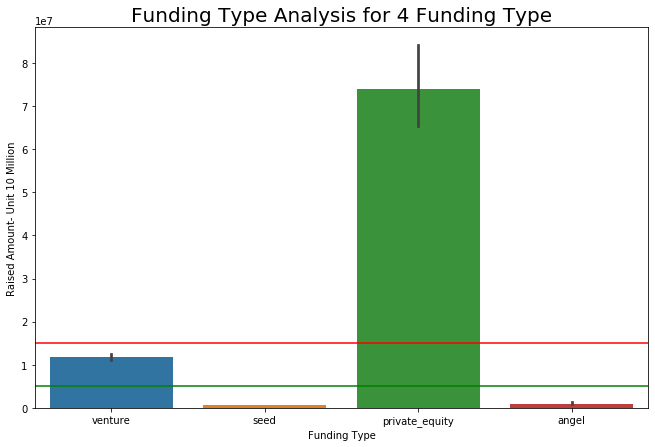

In [551]:
# plot for amount raised per funding type(4 types)
plt.figure(figsize=(11,7))
p=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
p.set(xlabel='Funding Type', ylabel='Raised Amount- Unit 10 Million')
p.set_title('Funding Type Analysis for 4 Funding Type',fontsize =20)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

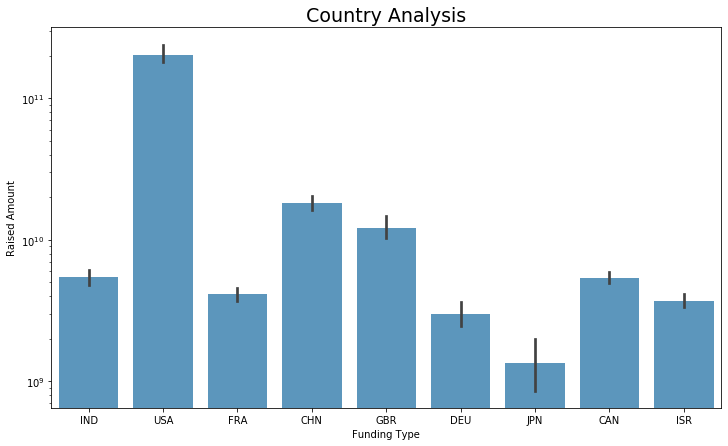

In [78]:
# Plot for funding across top 9 countries for funding type Venture
plt.figure(figsize=(12,7))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=master_FT, estimator=np.sum,color=(0.3, 0.6, 0.8, 0.7))
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =19)
plt.show()

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [88]:
master_D=D1[D1['main_sector'].isin(['Others','Health','Cleantech / Semiconductors'])]

In [92]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','News, Search and Messaging','Cleantech / Semiconductors'])], ignore_index=True)

In [93]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

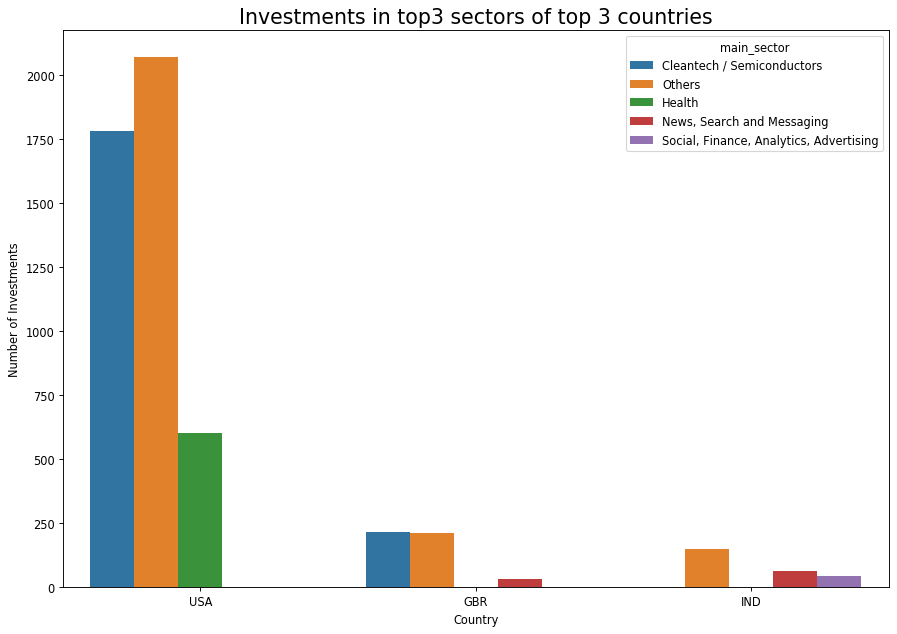

In [94]:
# set figure size for larger figure
plt.figure(num=None, figsize=(13, 9), dpi=82, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()